# Scaffold analysis in Python with RDKit and pandas
### Presentation/tutorial given at 28th Molecular Modelling Workshop, 2014 in Erlangen

### Dr. Samo Turk
#### BioMed X Innovation Center, Heidelberg  
<img src="files/biomedx.png">  
  

<p style="font-size:20px;"><strong>Python</strong></p>
<p style="font-size:20px;">[Python](http://www.python.org/) very popular programming language especially in science.</p>

<p style="font-size:20px;"><strong>pandas</strong></p>
<p style="font-size:20px;">[Pandas](http://pandas.pydata.org/) is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.  
No need for R!</p>

<p style="font-size:20px;"><strong>RDKit</strong></p>
<p style="font-size:20px;">[RDKit](http://www.rdkit.org/) is an open source chemistry toolkit.</p>

<p style="font-size:20px;"><strong>IPython</strong></p>
<p style="font-size:20px;">[IPython](http://ipython.org/) interactive python shell. Has web-based interactive computational environment IPython Notebook.</p>

### These are not slides but an interactive tutorial! https://github.com/Team-SKI/snippets
<br>
<br>
<br>
<br>
<br>
<br>

In [1]:
import pandas as pd
import rdkit.Chem as Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole # Enables RDKit IPython integration

### IPython and RDKit
RDKit provides IPython integration

In [2]:
mol = Chem.MolFromSmiles('O=C(O[C@@H]1[C@H]3C(=C/[C@H](C)C1)\C=C/[C@@H]([C@@H]3CC[C@H]2OC(=O)C[C@H](O)C2)C)[C@@H](C)CC')

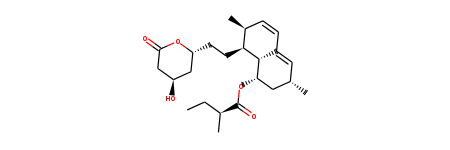

In [3]:
mol

In [4]:
Descriptors.NumHDonors(mol)

1

In [5]:
Descriptors.MolLogP(mol)

4.195500000000004

### RDKit and pandas
#### PandasTools.py

Load 'approved drugs' downloaded from www.drugbank.ca:   
**`% time`** *is a ipython magic function that tells you how much time did certain operation take to finish. It will be used to give you a feeling about speed of certain functions*

In [6]:
% time cpds = PandasTools.LoadSDF('approved.sdf', includeFingerprints=False)

RDKit WARNING: [16:08:33]  S group DAT ignored on line 1483
RDKit WARNING: [16:08:33]  S group DAT ignored on line 1483
RDKit WARNING: [16:08:33]  S group DAT ignored on line 1483
RDKit WARNING: [16:08:33]  S group DAT ignored on line 1483
RDKit WARNING: [16:08:33]  S group DAT ignored on line 11272
RDKit WARNING: [16:08:33]  S group DAT ignored on line 11272
RDKit WARNING: [16:08:33]  S group DAT ignored on line 11272
RDKit WARNING: [16:08:33]  S group DAT ignored on line 11272
RDKit WARNING: [16:08:34] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [16:08:34] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [16:08:34]  S group GEN ignored on line 78888
RDKit ERROR: [16:08:34]  Unhandled CTAB feature: S group COP on line: 102547. Molecule skipped.
RDKit ERROR: [16:08:34]  Unhandled CTAB feature: S group SRU on line: 106792. Molecule skipped.
RDKit ERROR: [16:08:34]  Unhandled CTAB feature: S group SRU on line: 129779. Molecule skipped.
RDK

CPU times: user 1.12 s, sys: 23.3 ms, total: 1.14 s
Wall time: 1.14 s


RDKit WARNING: [16:08:35]  S group MUL ignored on line 197940
RDKit ERROR: [16:08:35]  Unhandled CTAB feature: S group SRU on line: 199516. Molecule skipped.


In [7]:
cpds.columns

Index([u'ALOGPS_LOGP', u'ALOGPS_LOGS', u'ALOGPS_SOLUBILITY', u'BRANDS', u'CHEMICAL_FORMULA', u'DRUGBANK_ID', u'DRUG_GROUPS', u'EXACT_MASS', u'GENERIC_NAME', u'ID', u'INCHI_IDENTIFIER', u'INCHI_KEY', u'IUPAC_NAME', u'JCHEM_ACCEPTOR_COUNT', u'JCHEM_ACIDIC_PKA', u'JCHEM_BASIC_PKA', u'JCHEM_DONOR_COUNT', u'JCHEM_LOGP', u'JCHEM_PHYSIOLOGICAL_CHARGE', u'JCHEM_POLARIZABILITY', u'JCHEM_POLAR_SURFACE_AREA', u'JCHEM_REFRACTIVITY', u'JCHEM_ROTATABLE_BOND_COUNT', u'MOLECULAR_WEIGHT', u'ROMol', u'SALTS', u'SMILES', u'SYNONYMS'], dtype='object')

In [8]:
len(cpds)

1485

Assign the values of molnames and smiles (makes it easier to use this notebook on other sets with different col names)

In [9]:
molnames = 'DRUGBANK_ID'
smiles = 'SMILES'

Keep only columns 'DRUGBANK_ID', 'SMILES' and 'ROMol'

In [10]:
cpds = cpds[[molnames, smiles, 'ROMol']]

In [11]:
cpds.columns

Index([u'DRUGBANK_ID', u'SMILES', u'ROMol'], dtype='object')

,DRUGBANK_ID,SMILES,ROMol
0,DB00014,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H](CC1=CC=C(O)C=C1)NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CNC2=CC=CC=C12)NC(=O)[C@H](CC1=CN=CN1)NC(=O)[C@@H]1CCC(=O)N1)C(=O)N[C@@H](CCCN=C(N)N)C(=O)N1CCC[C@H]1C(=O)NNC(N)=O,
1,DB00035,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)[C@H](CC2=CC=C(O)C=C2)NC(=O)CCSSC[C@H](NC(=O)[C@H](CC(N)=O)NC1=O)C(=O)N1CCC[C@H]1C(=O)N[C@@H](CCCNC(N)=N)C(=O)NCC(N)=O,

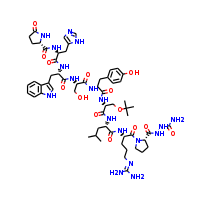
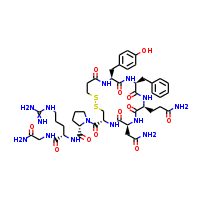

In [12]:
cpds.head(2)

Look at two columns and only first 2 lines:

,DRUGBANK_ID,ROMol
0,DB00014,
1,DB00035,

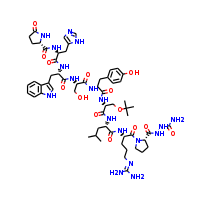
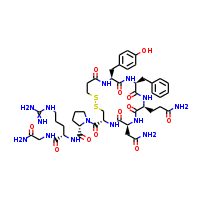

In [13]:
cpds[[molnames, 'ROMol']].head(2)

Remove lines with NaN (empty) values and duplicates

In [14]:
cpds = cpds.dropna()
cpds = cpds.drop_duplicates(molnames)
cpds = cpds.drop_duplicates(smiles)
len(cpds)

1482

### Descriptors
Add some descriptors

In [15]:
from rdkit.Chem import Descriptors
cpds['logp'] = cpds['ROMol'].map(Descriptors.MolLogP)
cpds['mw'] = cpds['ROMol'].map(Descriptors.MolWt)

Remove compounds with logp >= 5 and MW >= 500

In [16]:
cpds = cpds[cpds['logp'] <= 5]
cpds = cpds[cpds['mw'] <= 500]
len(cpds)

1158

In [17]:
cpds[[molnames, 'logp', 'mw', smiles]].head()

,DRUGBANK_ID,logp,mw,SMILES
6,DB00116,-0.2820,445.436,NC1=NC(=O)C2=C(NCC(CNC3=CC=C(C=C3)C(=O)N[C@@H](CCC(O)=O)C(O)=O)N2)N1
7,DB00117,-0.6359,155.157,N[C@@H](CC1=CN=CN1)C(O)=O
8,DB00118,-1.9222,399.453,C[S+](CC[C@H](N)C(O)=O)C[C@H]1O[C@H]([C@H](O)[C@@H]1O)N1C=NC2=C(N)N=CN=C12
9,DB00119,-0.3400,88.062,CC(=O)C(O)=O
10,DB00120,0.6410,165.192,N[C@@H](CC1=CC=CC=C1)C(O)=O


### Matplotlib and pylab
IPython has matplotlib integration

In [18]:
%matplotlib inline

/home/samo/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [19]:
import pylab
import numpy as np
import matplotlib as plt

##### Distribution on molecular weights
Bin the data and plot it

<function matplotlib.pyplot.show>

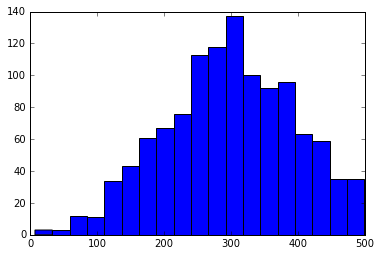

In [20]:
bins = np.linspace(cpds['mw'].min(), cpds['mw'].max(), 20)
pylab.hist(list(cpds['mw']), bins) # list() used for pandas 0.13!
pylab.show

### Alternative visualisation of a table
Default takes a lot of space

,DRUGBANK_ID,SMILES,ROMol,logp,mw
6,DB00116,NC1=NC(=O)C2=C(NCC(CNC3=CC=C(C=C3)C(=O)N[C@@H](CCC(O)=O)C(O)=O)N2)N1,,-0.282,445.436

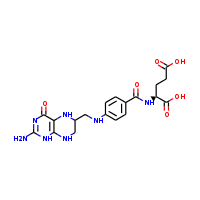

In [21]:
cpds.head(1)

### FrameToGridImage(pandasFrame, legendsCol=, molsPerRow=)
With this function you can visualize a dataframe (or part of it) as a single image

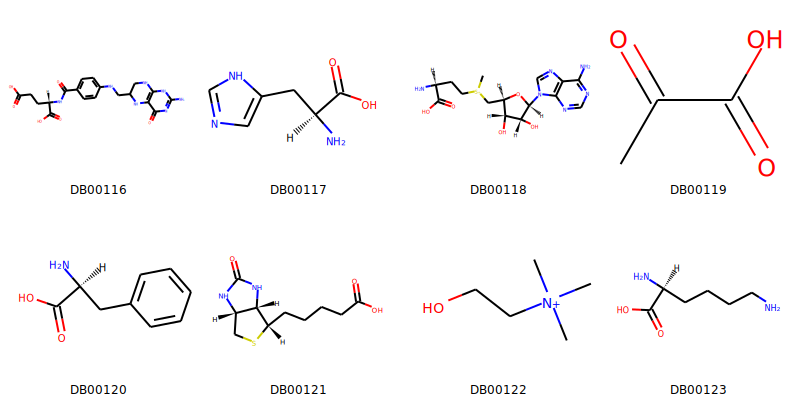

In [22]:
PandasTools.FrameToGridImage(cpds.head(8), legendsCol=molnames, molsPerRow=4)

You can define different colums as legends

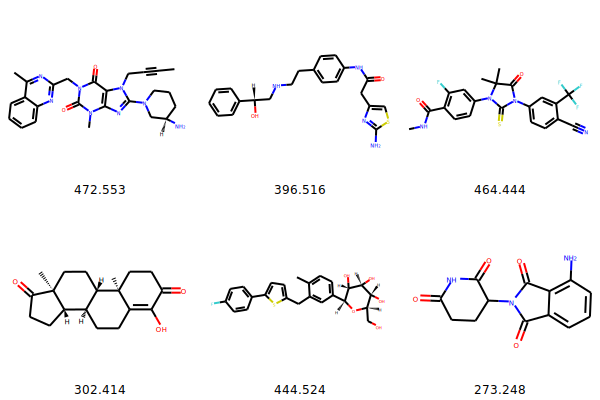

In [23]:
PandasTools.FrameToGridImage(cpds.tail(6), legendsCol='mw', molsPerRow=3)

<br>
<br>
<br>
<br>
<br>
<br>
## Murcko scaffold decomposition 
Bemis, G. W.; Murcko, M. A. “The Properties of Known Drugs. 1. Molecular Frameworks.” J. Med. Chem. 39:2887-93 (1996).  

Decomposition of molecules to scaffolds or generic frameworks

**Functionality present in RDKit. Added it to PandasTools**
<br>
<br>
<br>
<br>
<br>
<br>

In [24]:
from rdkit.Chem.Scaffolds import MurckoScaffold

How it works with RDKit:

In [25]:
scaffold = MurckoScaffold.GetScaffoldForMol(mol)
generic = MurckoScaffold.MakeScaffoldGeneric(MurckoScaffold.GetScaffoldForMol(mol))

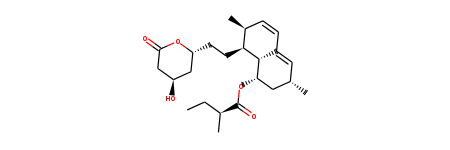

In [26]:
mol

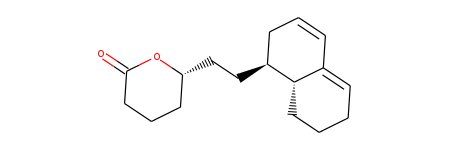

In [27]:
scaffold

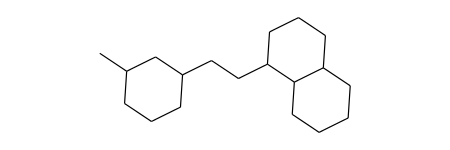

In [28]:
generic

### AddMurckoToFrame(pandasFrame, MurcoCol=, Generic=False)  
Returns SMILES of scaffolds (or generic frameworks)

In [29]:
% time PandasTools.AddMurckoToFrame(cpds)

CPU times: user 420 ms, sys: 33.3 ms, total: 453 ms
Wall time: 450 ms


In [30]:
% time PandasTools.AddMurckoToFrame(cpds, MurckoCol='Murcko_GENERIC', Generic=True)

CPU times: user 883 ms, sys: 13.3 ms, total: 897 ms
Wall time: 880 ms


,DRUGBANK_ID,SMILES,ROMol,logp,mw,Murcko_SMILES,Murcko_GENERIC
6,DB00116,NC1=NC(=O)C2=C(NCC(CNC3=CC=C(C=C3)C(=O)N[C@@H](CCC(O)=O)C(O)=O)N2)N1,,-0.282,445.436,O=c1nc[nH]c2c1NC(CNc1ccccc1)CN2,CC1CCCC2CCC(CCC3CCCCC3)CC12

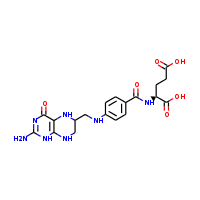

In [31]:
cpds.head(1)

Now we can use pandas groupby() functionality and group by scaffolds and create a **new frame** with scaffolds sorted by number of members

In [32]:
sortedScaffolds = cpds.groupby(['Murcko_SMILES']).count().sort(smiles, ascending=False)

-c:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [33]:
sortedScaffolds = sortedScaffolds[[smiles]] # Keep only smiles column
sortedScaffolds = sortedScaffolds.rename(columns={smiles:'count'}) # rename smiles column to count
sortedScaffolds['Murcko_SMILES'] = sortedScaffolds.index # actual SMILES are only in index column, move it
sortedScaffolds.index = range(len(sortedScaffolds))
sortedScaffolds.head()

,count,Murcko_SMILES
0,114,c1ccccc1
1,111,
2,18,O=C1C=CC2C(=C1)CCC1C3CCCC3CCC21
3,12,O=C1C=C2CCC3C4CCCC4CCC3C2CC1
4,12,O=C1CN=C(c2ccccc2)c2ccccc2N1


Add RDKit's ROMol column to scaffolds dataframe so we can visualize it

In [34]:
PandasTools.AddMoleculeColumnToFrame(sortedScaffolds, smilesCol='Murcko_SMILES')

,count,Murcko_SMILES,ROMol
0,114,c1ccccc1,

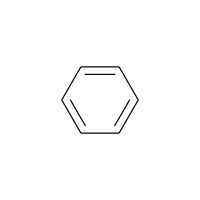

In [35]:
sortedScaffolds.head(1)

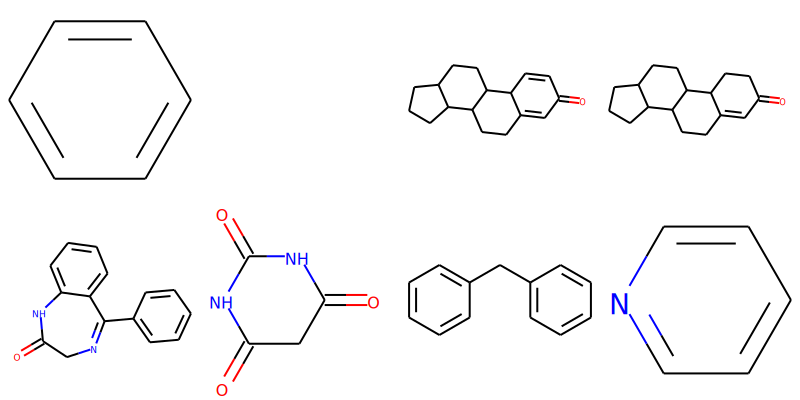

In [36]:
PandasTools.FrameToGridImage(sortedScaffolds.dropna().head(8), molsPerRow=4) #dropna drops compounds without scaffold

We can also retrieve all compounds with certain scaffold from original table  
Benzodiazepine scaffold is #4, SMILES: *O=C1CN=C(c2ccccc2)c2ccccc2N1*

,DRUGBANK_ID,SMILES,ROMol,logp,mw,Murcko_SMILES,Murcko_GENERIC
74,DB00186,OC1N=C(C2=CC=CC=C2Cl)C2=C(NC1=O)C=CC(Cl)=C2,,3.1013,321.163,O=C1CN=C(c2ccccc2)c2ccccc2N1,CC1CCC(C2CCCCC2)C2CCCCC2C1

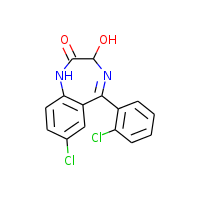

In [37]:
cpds[cpds['Murcko_SMILES'] == 'O=C1CN=C(c2ccccc2)c2ccccc2N1'].head(1)

### Aligning compounds to scaffolds
### AlignToScaffold(dataframe, molCol=, scaffoldCol=)

Lets get all benzodiazepines in seperate frame

In [38]:
somemols = cpds.groupby('Murcko_SMILES').get_group('O=C1CN=C(c2ccccc2)c2ccccc2N1')

Note how molecules are not alignied

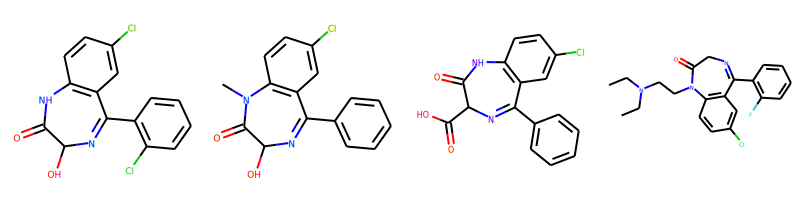

In [39]:
PandasTools.FrameToGridImage(somemols.head(4), molsPerRow=4)

Align them to scaffold

In [40]:
PandasTools.AlignToScaffold(somemols, molCol='ROMol', scaffoldCol='Murcko_SMILES')

/home/samo/anaconda/lib/python2.7/site-packages/rdkit/Chem/PandasTools.py:483: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame[molCol] = frame.apply(lambda x: AlignMol(x[molCol],x[scaffoldCol]), axis=1)


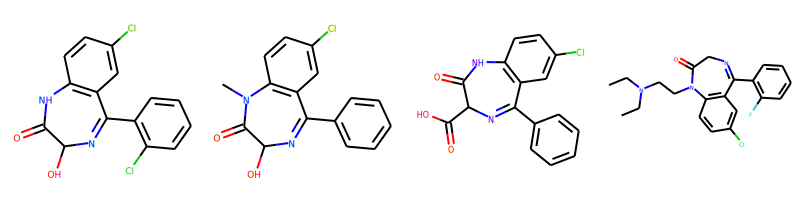

In [41]:
PandasTools.FrameToGridImage(somemols.head(4), molsPerRow=4)

<br>
<br>
<br>
<br>
<br>
<br>

### Check our GitHub https://github.com/Team-SKI/snippets
### Check our web page http://www.bio.mx.
<img src="files/biomedx.png">  
<br>

<img src="files/rdkit.png">  
<br>

<img src="files/merck.jpeg">  
<br>

# Thank you!

<br>
<br>
<br>
<br>
<br>
<br>

Copyright (C) 2014 by Samo Turk, [BioMed X GmbH](http://bio.mx/)

This work is licensed under the Creative Commons Attribution-ShareAlike 3.0 License. To view a copy of this license, visit http://creativecommons.org/licenses/by-sa/3.0/ or send a letter to Creative Commons, 543 Howard Street, 5th Floor, San Francisco, California, 94105, USA.